In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from graphviz import Source
from IPython.display import SVG
from PIL import Image as PIL_Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from sklearn import tree
from sklearn.linear_model import RidgeClassifier, SGDClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [2]:
os.environ["PATH"] += os.pathsep + 'M:\\MithrilData\\graphviz-2.38\\release\\bin'

## Loading data

In [3]:
DATA_DIR = 'data/'

data_files = [DATA_DIR + name for name in os.listdir(DATA_DIR)]

In [4]:
data = pd.read_csv(data_files[0], index_col=False)

for file_name in data_files[1:]:
    data = data.merge(pd.read_csv(file_name, index_col=False), 'outer')
data = data.dropna()
data.y = data.y.astype(int)

In [5]:
data

,a11,a12,a13,g11,g12,g13,a21,a22,a23,g21,g22,g23,a41,a42,a43,g41,g42,g43,y
0,-0.7728,-0.4000,0.6354,-0.8269,0.1567,0.4191,0.0022,0.0391,-0.0107,-0.7885,0.361978,0.3142,0.0598,0.0060,-0.5673,-0.9958,-0.0344,0.0324,0
1,-1.2610,-0.3838,1.0322,-0.8420,0.1469,0.4094,-0.0011,0.1194,0.0318,-0.8022,0.359078,0.3156,0.1412,0.1435,-1.1404,-1.0090,-0.0444,0.0434,0
2,-2.0293,-0.8083,1.6296,-0.8522,0.1386,0.4213,-0.1446,0.1948,0.0693,-0.7937,0.356378,0.3151,0.3303,0.2544,-1.7981,-1.0036,-0.0385,0.0595,0
3,-2.4495,-1.0002,2.0051,-0.8503,0.1435,0.4187,-0.1529,0.1783,0.0584,-0.8041,0.369778,0.3095,0.4956,0.3834,-2.3733,-1.0080,-0.0327,0.0708,0
4,-2.9799,-1.4031,2.4971,-0.8566,0.1389,0.4318,-0.0492,-0.3655,0.0610,-0.8049,0.356578,0.3256,0.4869,1.1145,-2.1079,-0.9890,-0.0451,-0.0126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,11.2411,-6.9992,-9.9406,-0.9399,-0.2238,0.3701,6.9052,-6.8393,-7.2155,-0.7639,-0.137600,0.4318,10.1665,3.5670,9.9323,-0.7915,0.1918,-0.6311,1
3098,11.8757,-8.3691,-10.1669,-0.9182,-0.1777,0.3483,7.3052,-8.2694,-7.1478,-0.7692,-0.145200,0.4633,10.9996,4.3370,10.3739,-0.7866,0.1677,-0.6108,1
3099,12.2927,-9.1096,-10.3959,-0.9448,-0.1459,0.3579,7.2834,-9.1374,-7.0975,-0.7731,-0.145700,0.4645,11.5408,4.8916,10.7141,-0.7912,0.1530,-0.6135,1
3100,12.5331,-9.3198,-10.7699,-0.9431,-0.1572,0.3601,7.6534,-9.8912,-7.3730,-0.7697,-0.124200,0.4418,11.8769,5.2202,10.9720,-0.7893,0.1608,-0.6154,1


In [6]:
data[data.y == 0].describe()

,a11,a12,a13,g11,g12,g13,a21,a22,a23,g21,g22,g23,a41,a42,a43,g41,g42,g43,y
count,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.0
mean,11.367881,-3.129397,-11.640026,-0.745705,-0.007224,0.525288,12.588598,-1.994937,-9.313196,-0.616279,0.267296,0.462469,21.773385,-4.738642,15.536181,-0.819178,-0.098126,-0.386923,0.0
std,12.217649,9.447097,13.634698,0.150953,0.227165,0.169712,13.703150,8.402031,13.718740,0.190664,0.203076,0.220573,11.347649,10.908207,16.720241,0.182960,0.188431,0.362576,0.0
min,-21.005500,-29.381300,-54.350100,-1.181600,-0.648100,-0.012900,-17.512300,-33.304500,-45.190500,-1.269200,-0.356900,-0.303400,-0.325000,-28.629500,-36.137200,-1.227000,-0.600500,-1.070800,0.0
25%,3.728225,-9.299375,-22.129700,-0.849375,-0.177975,0.414700,2.488150,-6.766500,-15.615925,-0.746925,0.151750,0.349175,12.658675,-10.932675,5.374025,-0.959325,-0.204500,-0.660650,0.0
50%,11.153750,-2.078450,-11.909400,-0.758300,0.022200,0.536850,9.174500,-3.039250,-6.680400,-0.612500,0.255678,0.479550,21.386100,-4.628800,17.072000,-0.859800,-0.124600,-0.443650,0.0
75%,20.948925,1.869750,-2.657650,-0.666425,0.155500,0.643350,21.946350,2.567175,-1.260750,-0.471550,0.378675,0.610425,30.598450,1.529875,27.152750,-0.739150,0.007075,-0.125300,0.0
max,52.905800,24.391000,28.825100,-0.050200,0.609800,1.051200,46.233000,22.849300,23.925300,0.018500,0.947478,1.019000,60.714700,26.218800,61.668200,-0.200600,0.607400,0.606600,0.0


In [7]:
data[data.y == 1].describe()

,a11,a12,a13,g11,g12,g13,a21,a22,a23,g21,g22,g23,a41,a42,a43,g41,g42,g43,y
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.0
mean,3.965532,-0.682507,-3.966750,-0.899706,0.050684,0.351988,2.618108,-0.831174,-2.386314,-0.792120,-0.070175,0.556351,4.631398,-0.005245,4.593040,-0.807455,0.120083,-0.585530,1.0
std,3.832203,1.556097,3.681389,0.093991,0.050642,0.134274,3.701145,2.043314,3.310212,0.051586,0.097844,0.157030,3.762036,1.246910,3.551929,0.074568,0.059762,0.110676,0.0
min,-4.861100,-9.948600,-23.747500,-1.182800,-0.279000,-0.018700,-5.443900,-10.401200,-23.241400,-0.989000,-0.427200,0.203300,-2.417600,-8.712900,-1.520000,-1.066100,-0.167400,-1.252400,1.0
25%,1.950550,-1.605800,-5.297825,-1.003525,0.028725,0.220125,0.215225,-1.979150,-4.191625,-0.827100,-0.141650,0.371925,2.150650,-0.575100,2.200925,-0.873700,0.081425,-0.658200,1.0
50%,3.322850,-0.727700,-3.237200,-0.870200,0.054900,0.394850,1.867850,-0.494650,-1.730950,-0.801200,-0.102500,0.625000,3.671950,0.004000,3.722150,-0.800000,0.140600,-0.612300,1.0
75%,5.304900,0.252450,-1.972525,-0.833900,0.079100,0.443375,4.687750,0.331900,-0.216350,-0.763050,0.025875,0.673575,6.548725,0.622300,6.337600,-0.759500,0.158250,-0.485875,1.0
max,26.058300,5.874900,3.452200,-0.497300,0.443600,1.034600,23.429200,5.111500,4.077800,-0.386200,0.220400,1.154700,24.548600,5.706600,22.793400,-0.485800,0.318600,-0.242600,1.0


1: a1, a2

2: a1, a2

3: a1, a2 (corrupted now)

4: a2, a3

## Plotting

In [8]:
def plot_scatter(x, y, c, title=None, xlabel='', ylabel='', plot_size=(6, 6)):
    plt.figure(figsize=plot_size)
    plt.scatter(x[c == 0], y[c == 0], c='red', alpha=0.1, label='Bad')
    plt.scatter(x[c == 1], y[c == 1], c='green', alpha=0.1, label='Good')
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def plot_device_data(device):
    device = str(device)
    plot_scatter(data['a' + device + '1'], data['a' + device + '2'], data.y, 
                 'Device ' + device + ' angles',
                 'Angle 1, degrees',
                 'Angle 2, degrees',
                )
    plot_scatter(data['a' + device + '1'], data['a' + device + '3'], data.y,
                 'Device ' + device + ' angles',
                 'Angle 1, degrees',
                 'Angle 3, degrees',
                )
    plot_scatter(data['a' + device + '2'], data['a' + device + '3'], data.y, 
                 'Device ' + device + ' angles',
                 'Angle 2, degrees',
                 'Angle 3, degrees',
                )
    plot_scatter(data['g' + device + '1'], data['g' + device + '2'], data.y, 
                 'Device ' + device + ' gravity',
                 'Gravity 1, divided by g',
                 'Gravity 2, divided by g',
                )
    plot_scatter(data['g' + device + '1'], data['g' + device + '3'], data.y, 
                 'Device ' + device + ' gravity',
                 'Gravity 1, divided by g',
                 'Gravity 3, divided by g',
                )
    plot_scatter(data['g' + device + '2'], data['g' + device + '3'], data.y, 
                 'Device ' + device + ' gravity',
                 'Gravity 2, divided by g',
                 'Gravity 3, divided by g',
                )

In [9]:
def make_3d_frames(prefix, label, dir_name='frames'):
    fig = plt.figure(figsize=(7, 7))
    fig.suptitle('Device ' + prefix[1], fontsize=16, x=0.5, y=0.85)
    ax = fig.gca(projection='3d')
    ax.scatter(data[data.y == 0][prefix+'1'].sample(300, random_state=42), 
               data[data.y == 0][prefix+'2'].sample(300, random_state=42),
               data[data.y == 0][prefix+'3'].sample(300, random_state=42),
               c='red', label='Bad',  alpha=0.3)
    ax.scatter(data[data.y == 1][prefix+'1'].sample(300, random_state=42),
               data[data.y == 1][prefix+'2'].sample(300, random_state=42),
               data[data.y == 1][prefix+'3'].sample(300, random_state=42),
               c='green', label='Good', alpha=0.3)
    ax.set_xlabel(label + ' 1')
    ax.set_ylabel(label + ' 2')
    ax.set_zlabel(label + ' 3')
    ax.legend(loc='upper right')

    ax.elev = 25.
    ax.azim = 321.
    ax.dist = 11.

    for n in range(0, 360):
        ax.azim = ax.azim-1
        if n < 180:
            ax.dist = ax.dist-0.04
        else:
            ax.dist = ax.dist+0.04
        step_str = str(n)
        filename = dir_name+'/step'+step_str+'.png'
        plt.savefig(filename, bbox_inches='tight')

def render_gif(name):
    frames = []
    imgs = glob.glob("frames/*.png")
    for i in imgs:
        new_frame = PIL_Image.open(i)
        frames.append(new_frame)

    frames[0].save(name, format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=100, loop=0)

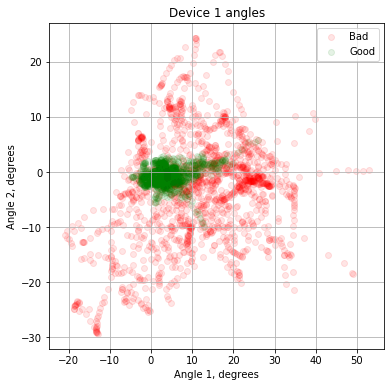

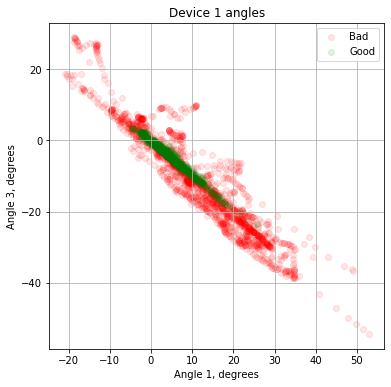

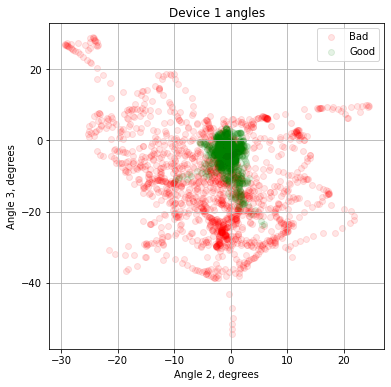

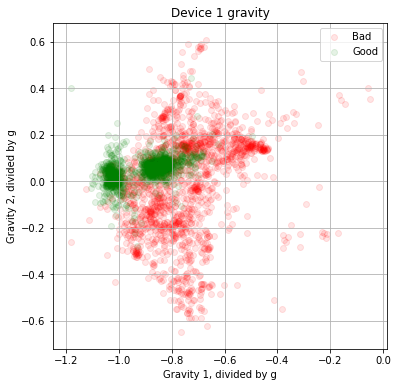

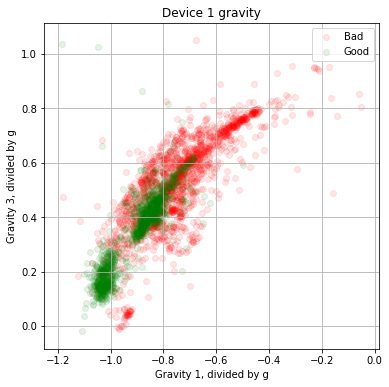

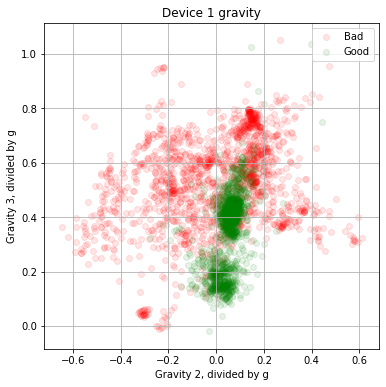

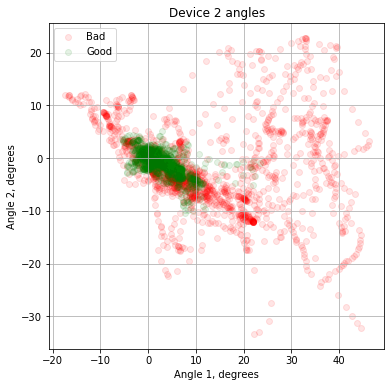

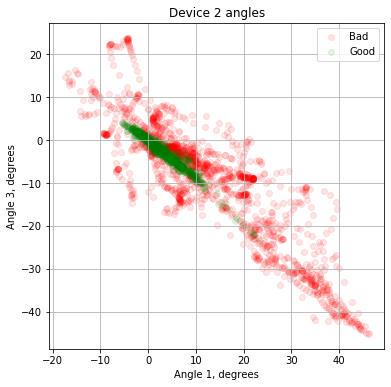

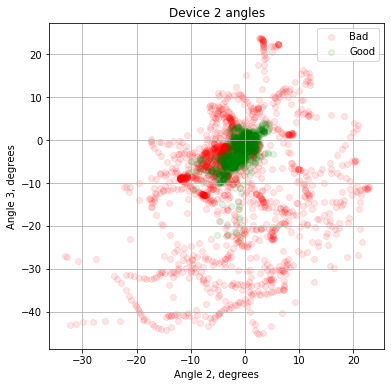

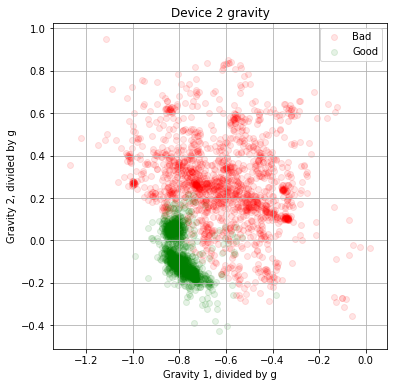

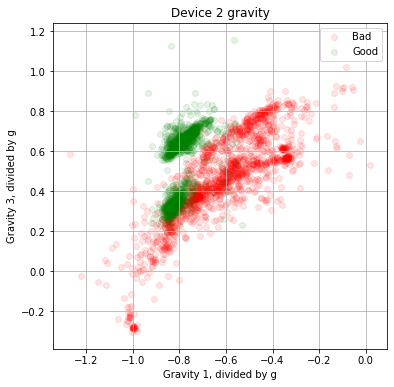

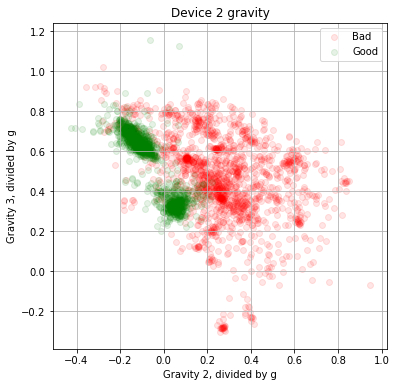

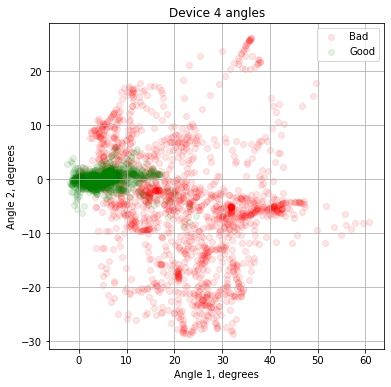

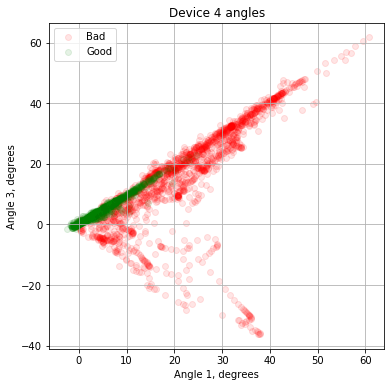

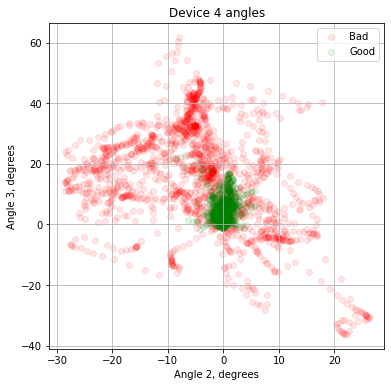

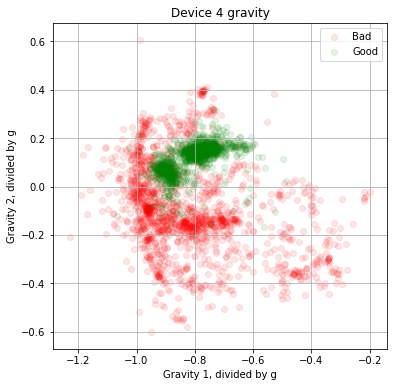

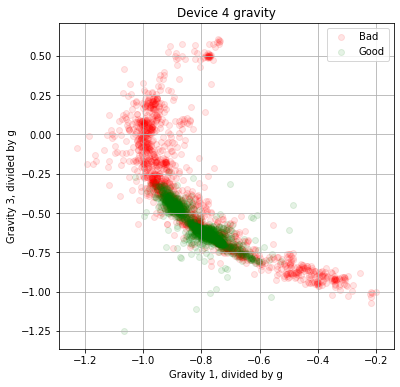

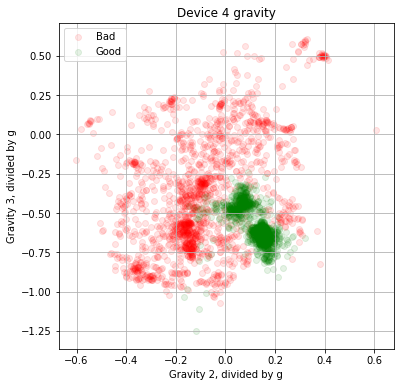

In [10]:
for i in [1, 2, 4]:
    plot_device_data(i)

In [11]:
#make_3d_frames('g2', 'Gravity')

## Working with data

In [12]:
corr_matrix = data.corr()

In [13]:
corr_matrix['y'].sort_values(ascending=False)

y      1.000000
g42    0.608953
a13    0.353196
a23    0.322656
a42    0.286408
g23    0.236560
a12    0.174574
g12    0.170229
a22    0.093069
g41    0.041313
g43   -0.342277
a11   -0.373017
a43   -0.406119
a21   -0.438631
g13   -0.490856
g11   -0.518733
g21   -0.526080
a41   -0.706234
g22   -0.722539
Name: y, dtype: float64

In [14]:
X = data.drop('y', 1)
y = data.y
#X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train

,a11,a12,a13,g11,g12,g13,a21,a22,a23,g21,g22,g23,a41,a42,a43,g41,g42,g43
976,3.7779,0.3239,-4.1024,-0.7673,0.1804,0.5227,3.9048,-2.7735,-2.0899,-0.7277,0.280478,0.3779,14.6846,-3.5485,15.4763,-0.9606,-0.1074,-0.2971
1772,6.5867,1.7936,-6.4072,-0.8989,0.0830,0.4387,4.1449,-1.2582,-3.1761,-0.7753,-0.156700,0.6245,5.2492,1.0177,4.8206,-0.7602,0.2075,-0.6108
630,-7.0929,-14.3161,6.7139,-0.9687,-0.3012,0.0603,-0.7141,3.1927,11.8370,-1.0214,0.254578,-0.2470,23.1143,9.8469,-7.6944,-0.8156,0.3898,0.5146
2622,1.3193,1.5051,-0.7640,-1.0361,0.0273,0.1093,1.2189,0.3139,-1.3078,-0.8261,0.061700,0.3403,1.2697,-0.0133,1.2199,-0.9521,0.0947,-0.3806
482,7.0313,-3.6471,-8.2773,-0.6662,0.1174,0.6408,5.9834,-5.7345,-2.1886,-0.6899,0.151578,0.3769,20.6122,0.2409,21.9995,-0.9204,-0.0385,-0.4560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,9.2740,-0.2006,-8.7724,-0.9562,-0.0625,0.2846,6.5059,0.2420,-7.2979,-0.7380,0.023900,0.4392,5.9865,-2.4488,6.7171,-0.8400,0.0229,-0.5449
1096,0.0352,-0.3840,-0.3034,-0.8745,0.0812,0.3852,-0.3840,-0.1289,0.3314,-0.8217,-0.127600,0.6152,0.3949,0.5861,0.4984,-0.8156,0.1501,-0.5959
1131,2.9034,0.4157,-2.9631,-0.8613,0.0844,0.4155,2.1608,0.1302,-2.1336,-0.8083,-0.103500,0.6467,3.2736,-0.3585,3.5396,-0.7951,0.1428,-0.6254
1295,2.1583,-2.3509,-2.5985,-0.8349,0.0000,0.4101,1.6619,0.3183,-1.4619,-0.7641,-0.140800,0.6442,2.8403,0.0573,2.7422,-0.7922,0.1652,-0.6328


### Linear regression

#### All devices

In [16]:
ridge = RidgeClassifier(random_state=42)
ridge.fit(X_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)

In [17]:
accuracy_score(ridge.predict(X_test), y_test)

0.9980449657869013

In [18]:
list(zip(data.columns, ridge.coef_[0]))

[('a11', 0.014977389982184662),
 ('a12', -0.011184801880085193),
 ('a13', -0.032147824131394886),
 ('g11', -2.1675882770028507),
 ('g12', 2.3486384028881497),
 ('g13', -2.030030389559555),
 ('a21', -0.030590159104874896),
 ('a22', 0.01554960218675369),
 ('a23', 0.01260956237056558),
 ('g21', 0.64924847147549),
 ('g22', -1.847955959410111),
 ('g23', 1.0133895279563099),
 ('a41', 0.003762414102879997),
 ('a42', -0.006763972898504504),
 ('a43', -0.014074311031744523),
 ('g41', -0.09457515120207083),
 ('g42', 1.193689419236368),
 ('g43', -0.6622413215817751)]

In [19]:
sorted(list(zip(data.columns, ridge.coef_[0])), key=lambda x : x[1], reverse=True)

[('g12', 2.3486384028881497),
 ('g42', 1.193689419236368),
 ('g23', 1.0133895279563099),
 ('g21', 0.64924847147549),
 ('a22', 0.01554960218675369),
 ('a11', 0.014977389982184662),
 ('a23', 0.01260956237056558),
 ('a41', 0.003762414102879997),
 ('a42', -0.006763972898504504),
 ('a12', -0.011184801880085193),
 ('a43', -0.014074311031744523),
 ('a21', -0.030590159104874896),
 ('a13', -0.032147824131394886),
 ('g41', -0.09457515120207083),
 ('g43', -0.6622413215817751),
 ('g22', -1.847955959410111),
 ('g13', -2.030030389559555),
 ('g11', -2.1675882770028507)]

In [20]:
bias = np.array(X_test)[0] @ np.transpose(ridge.coef_[0]) - ridge.decision_function([np.array(X_test)[0]])[0]
bias

1.2202560232746031

In [21]:
y_pred = ridge.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[540,   0],
       [  2, 481]], dtype=int64)

#### Angles data

In [22]:
ridge = RidgeClassifier(random_state=42)
ridge.fit(X_train[['a11', 'a12', 'a13', 'a21', 'a22', 'a23', 'a41', 'a42', 'a43']], y_train)

accuracy_score(ridge.predict(X_test[['a11', 'a12', 'a13', 'a21', 'a22', 'a23', 'a41', 'a42', 'a43']]), y_test)

0.9423264907135875

#### Single device. All data

In [23]:
ridge = RidgeClassifier(random_state=42)
ridge.fit(X_train[['a41', 'a42', 'a43', 'g41', 'g42', 'g43']], y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)

In [24]:
accuracy_score(ridge.predict(X_test[['a41', 'a42', 'a43', 'g41', 'g42', 'g43']]), y_test)

0.9530791788856305

#### Single device. Angles data

In [25]:
ridge = RidgeClassifier(random_state=42)
ridge.fit(X_train[['a41', 'a42', 'a43']], y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)

In [26]:
accuracy_score(ridge.predict(X_test[['a41', 'a42', 'a43']]), y_test)

0.8670576735092864

#### Single device. Gravity data

In [27]:
ridge = RidgeClassifier(random_state=42)
ridge.fit(X_train[['g41', 'g42', 'g43']], y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)

In [28]:
accuracy_score(ridge.predict(X_test[['g41', 'g42', 'g43']]), y_test)

0.8973607038123167

### Decision tree

In [29]:
dtree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
accuracy_score(dtree.predict(X_test), y_test)

0.9579667644183774

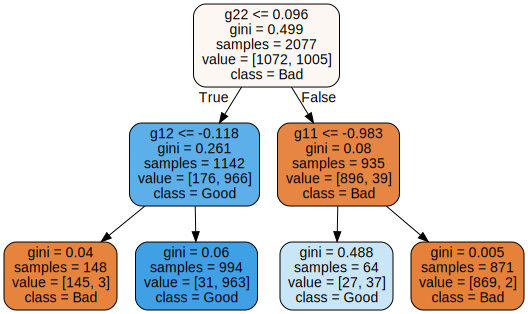

In [31]:
graph = Source( tree.export_graphviz(dtree, out_file=None, feature_names=X.columns, rounded=True, proportion=False, 
                precision=3, filled=True, class_names=['Bad', 'Good']))
SVG(graph.pipe(format='svg'))

In [32]:
y_pred = dtree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[505,  35],
       [  8, 475]], dtype=int64)

In [33]:
y_pred = X_test.to_numpy()[:, 10] <= 0.096
accuracy_score(y_test, y_pred)

0.906158357771261

In [34]:
confusion_matrix(y_test, y_pred)

array([[465,  75],
       [ 21, 462]], dtype=int64)

### SVM

In [35]:
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
accuracy_score(svm.predict(X_test), y_test)

0.9970674486803519

In [37]:
data_rows = ['a11', 'a12', 'a13', 'a21', 'a22', 'a23', 'a41', 'a42', 'a43']
svm = SVC(kernel='linear')
svm.fit(X_train[data_rows], y_train)

accuracy_score(svm.predict(X_test[data_rows]), y_test)

0.9824046920821115

In [38]:
svm.coef_

array([[ 0.6189635 ,  0.76301194,  0.18675978, -0.12883626, -0.32694838,
         0.01772726, -0.84408115,  0.28439756,  0.30089876]])

In [39]:
bias = (np.array(X_test[data_rows]) @ svm.coef_[0] - svm.decision_function(X_test[data_rows]))[0]
bias

-4.868419785357038